In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [76]:
df = pd.read_csv('HappinessAlcoholConsumption.csv')

print(df.head())

       Country          Region Hemisphere  HappinessScore  HDI  GDP_PerCapita  \
0      Denmark  Western Europe      north           7.526  928         53.579   
1  Switzerland  Western Europe      north           7.509  943         79.866   
2      Iceland  Western Europe      north           7.501  933         60.530   
3       Norway  Western Europe      north           7.498  951         70.890   
4      Finland  Western Europe      north           7.413  918         43.433   

   Beer_PerCapita  Spirit_PerCapita  Wine_PerCapita  
0             224                81             278  
1             185               100             280  
2             233                61              78  
3             169                71             129  
4             263               133              97  


# Cleaning the Data


In [77]:
# Missing Values

print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())


Missing Values Before Cleaning:
Country             0
Region              0
Hemisphere          0
HappinessScore      0
HDI                 0
GDP_PerCapita       0
Beer_PerCapita      0
Spirit_PerCapita    0
Wine_PerCapita      0
dtype: int64


In [78]:
# Cleaning the data frame

df = df.dropna().drop_duplicates()

In [79]:
# Check for data types and structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           122 non-null    object 
 1   Region            122 non-null    object 
 2   Hemisphere        122 non-null    object 
 3   HappinessScore    122 non-null    float64
 4   HDI               122 non-null    int64  
 5   GDP_PerCapita     122 non-null    float64
 6   Beer_PerCapita    122 non-null    int64  
 7   Spirit_PerCapita  122 non-null    int64  
 8   Wine_PerCapita    122 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 8.7+ KB


In [80]:
df.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


# Basic Descriptive Statistics


In [81]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

In [82]:
# # Loop through each column and calculate the statistics
# for column in columns:
#     print(f"Statistics for '{column}':")
    
#     # Select the column
#     data = df[column]
    
#     # 1. Central Tendency: Mean, Median, Mode
#     mean_val = data.mean()
#     median_val = data.median()
#     mode_val = data.mode().iloc[0] if not data.mode().empty else np.nan
    
#     print(f"  Mean: {mean_val}")
#     print(f"  Median: {median_val}")
#     print(f"  Mode: {mode_val}")

#     # 2. Spread of Data: Standard Deviation and Variance
#     std_val = data.std()
#     var_val = data.var()
    
#     print(f"  Standard Deviation: {std_val}")
#     print(f"  Variance: {var_val}")

#     # 3. Min, Max, and Range
#     min_val = data.min()
#     max_val = data.max()
#     range_val = max_val - min_val
    
#     print(f"  Min: {min_val}")
#     print(f"  Max: {max_val}")
#     print(f"  Range: {range_val}")

#     # 4. Percentiles (25th, 50th, 75th Percentiles)
#     percentiles = np.percentile(data.dropna(), [25, 50, 75])
    
#     print(f"  25th Percentile: {percentiles[0]}")
#     print(f"  50th Percentile (Median): {percentiles[1]}")
#     print(f"  75th Percentile: {percentiles[2]}")

#     # 5. Summary Statistics using scipy.stats.describe
#     summary = stats.describe(data.dropna())
    
#     print("\n  Summary Statistics from scipy.stats.describe:")
#     print(f"  Count: {summary.nobs}")
#     print(f"  Min: {summary.minmax[0]}")
#     print(f"  Max: {summary.minmax[1]}")
#     print(f"  Mean: {summary.mean}")
#     print(f"  Variance: {summary.variance}")
#     print(f"  Skewness: {summary.skewness}")
#     print(f"  Kurtosis: {summary.kurtosis}")
#     print("\n" + "-"*50)

# Visualization


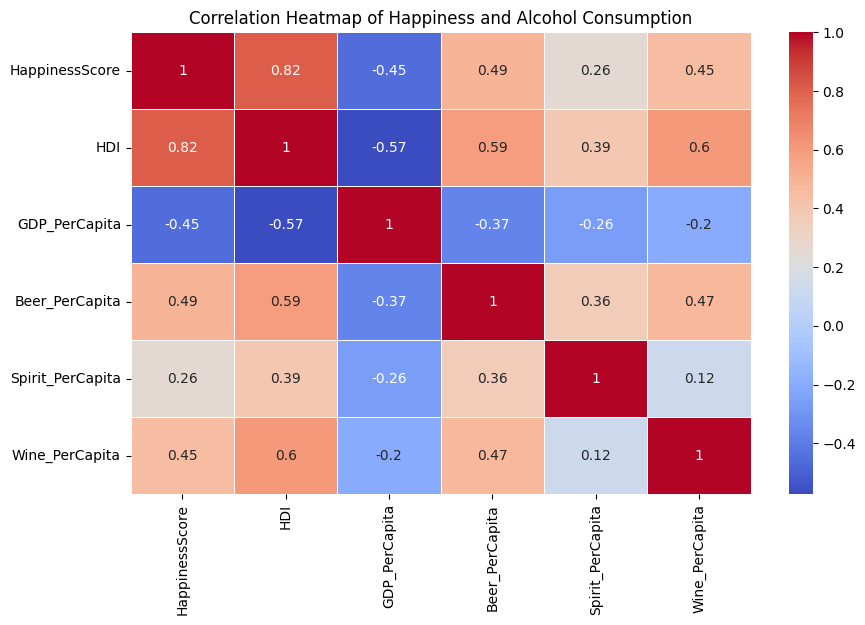

In [97]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

# Extract the relevant columns
df_selected = df[columns]

# Compute the correlation matrix
correlation_matrix = df_selected.corr()

# Set the figure size for better readability
plt.figure(figsize=(10, 6))

# Create the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Heatmap of Happiness and Alcohol Consumption')
plt.show()

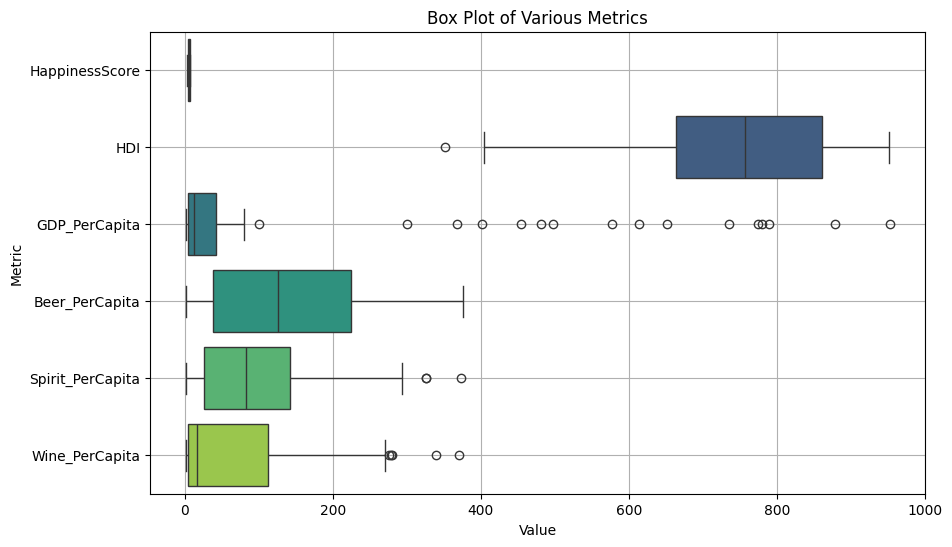

In [98]:
# Melt the dataframe to long format
df_melted = df[columns].melt(var_name='Metric', value_name='Value')

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot with values on the x-axis and metrics on the y-axis
sns.boxplot(x='Value', y='Metric', data=df_melted, hue='Metric', palette='viridis', dodge=False)

# Set the title and labels
plt.title('Box Plot of Various Metrics')
plt.xlabel('Value')
plt.ylabel('Metric')

# Display the plot
plt.grid(True)
plt.show()


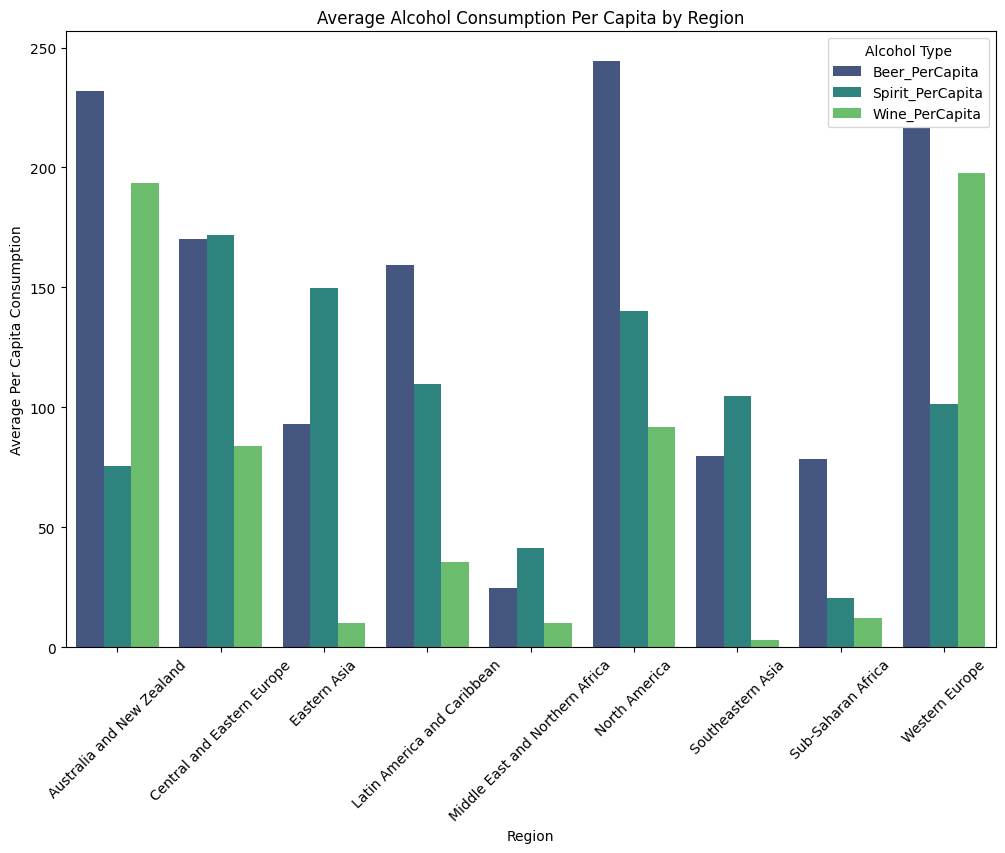

In [99]:
# Group by region and calculate the mean consumption per capita for each type
region_alcohol_consumption = df.groupby('Region')[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean().reset_index()

# Melt the dataframe to have a format suitable for seaborn
region_alcohol_consumption_melted = region_alcohol_consumption.melt(id_vars='Region', var_name='Alcohol_Type', value_name='PerCapita')

# Set the figure size for better readability
plt.figure(figsize=(12, 8))

# Create the bar plot using seaborn
sns.barplot(x='Region', y='PerCapita', hue='Alcohol_Type', data=region_alcohol_consumption_melted, palette='viridis')

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Set the title and labels
plt.title('Average Alcohol Consumption Per Capita by Region')
plt.xlabel('Region')
plt.ylabel('Average Per Capita Consumption')

# Display the plot
plt.legend(title='Alcohol Type')
plt.show()

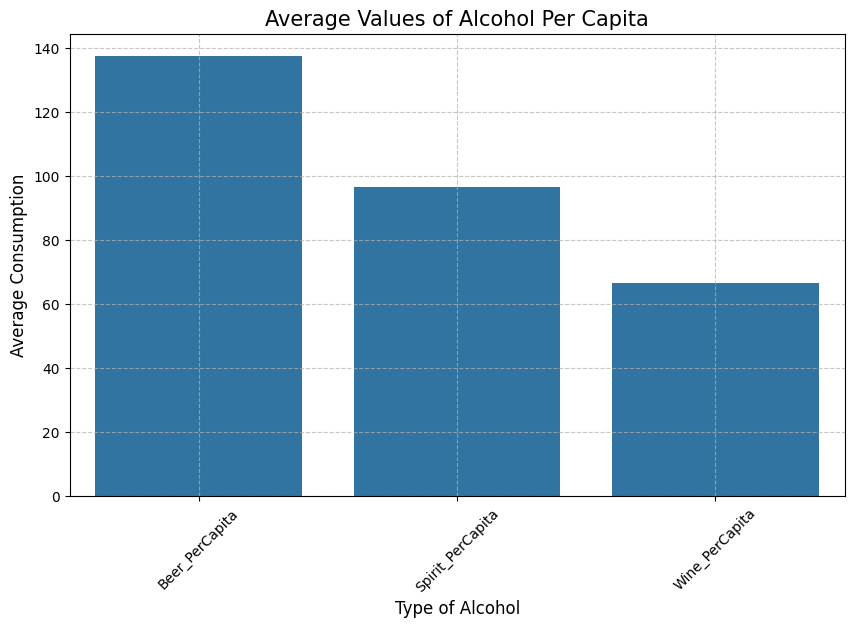

In [101]:
# Select columns of interest
columns = ['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

# Calculate mean values for these columns
mean_values = df[columns].mean().reset_index()
mean_values.columns = ['Metric', 'Average Value']

plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Average Value', data=mean_values)

plt.title('Average Values of Alcohol Per Capita', fontsize=15)
plt.xlabel('Type of Alcohol', fontsize=12)
plt.ylabel('Average Consumption', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

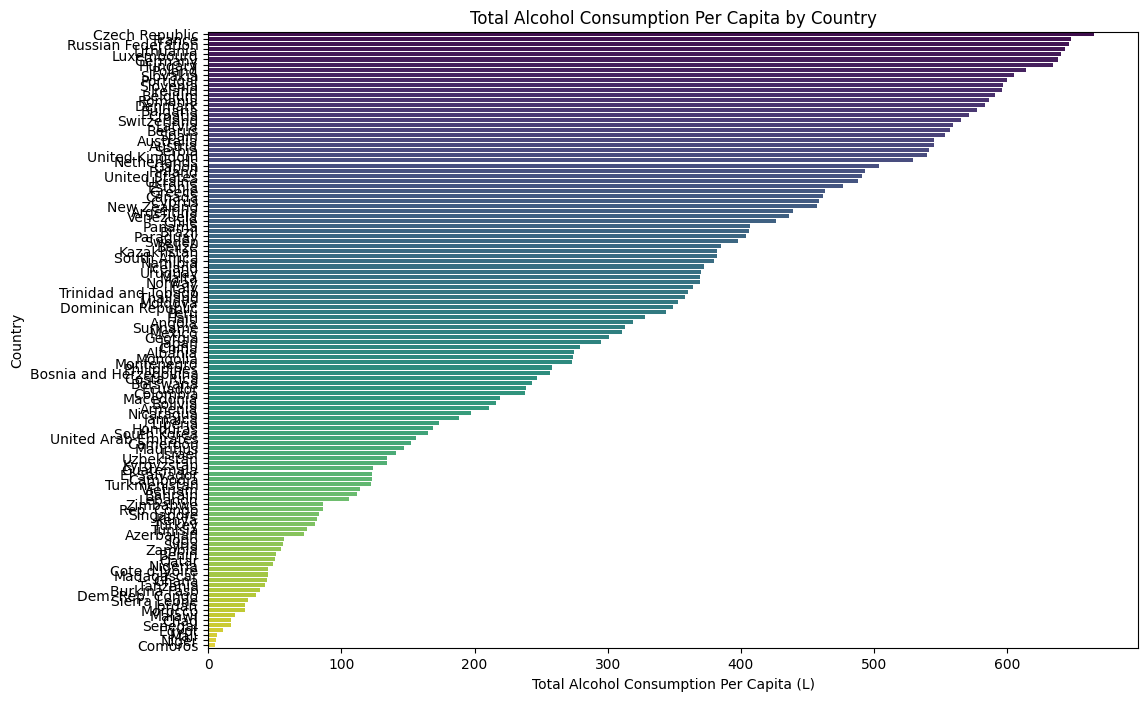

In [102]:
# Calculate total alcohol consumption per capita for each country
df['Total_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].sum(axis=1)

# Sort the countries by total alcohol consumption for better visualization
df = df.sort_values(by='Total_Alcohol_PerCapita', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the bar plot using seaborn
sns.barplot(x='Total_Alcohol_PerCapita', y='Country', hue='Country', data=df, palette='viridis', dodge=False, legend=False)

# Set the title and labels
plt.title('Total Alcohol Consumption Per Capita by Country')
plt.xlabel('Total Alcohol Consumption Per Capita (L)')
plt.ylabel('Country')

# Display the plot
plt.show()


In [103]:
# Calculate the average alcohol consumption per capita by summing Beer, Spirit, and Wine columns
df['Avg_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean(axis=1)

# Plotting the geomap using Plotly Express
fig = px.choropleth(df, 
                    locations='Country',  # Make sure you have a 'Country' column with country names
                    locationmode='country names', 
                    color='Avg_Alcohol_PerCapita',
                    hover_name='Country',  # This shows the country name when hovering
                    color_continuous_scale='Blues',
                    labels={'Avg_Alcohol_PerCapita': 'Average Alcohol Consumption (L)'},
                    title='Average Alcohol Consumption Per Capita by Country')

# Show the plot
fig.show()


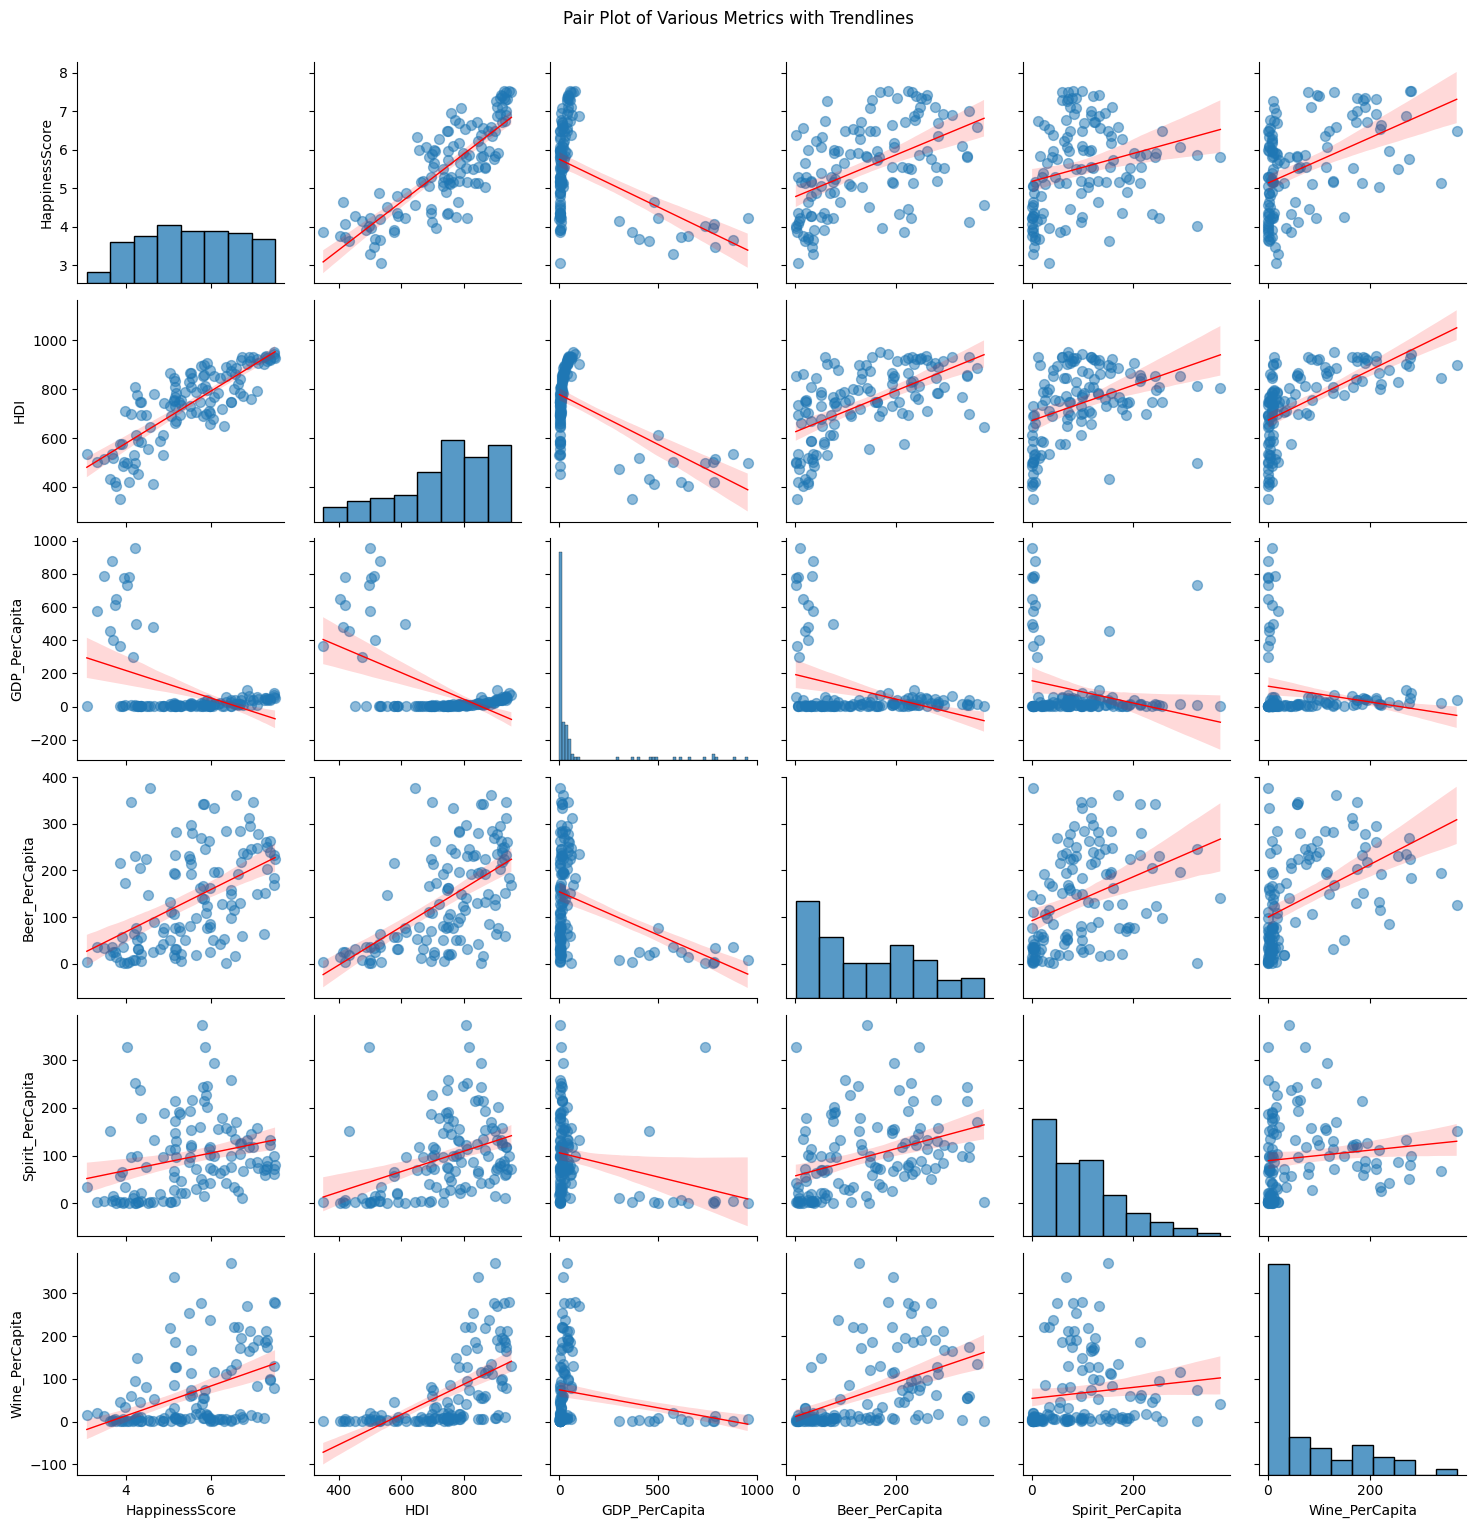

In [104]:
columns = ['HappinessScore', 'HDI', 'GDP_PerCapita', 'Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']

# Create the pair plot with trendlines and adjusted transparency
g = sns.pairplot(df[columns], kind='reg', plot_kws={
    'scatter_kws': {'s': 50, 'alpha': 0.5},  # Adjust the transparency of data points
    'line_kws': {'color': 'red', 'linewidth': 1}  # Customize the appearance of trendlines
})

# Set the title
plt.suptitle('Pair Plot of Various Metrics with Trendlines', y=1.02)

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

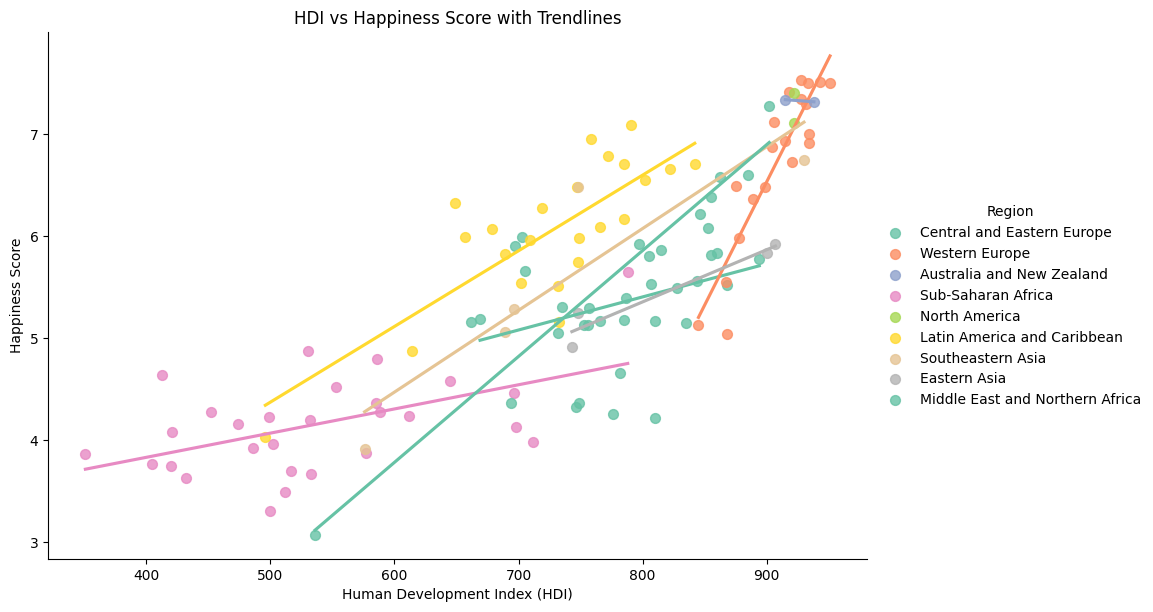

In [110]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression lines using lmplot
sns.lmplot(x='HDI', y='HappinessScore', hue='Region', data=df, 
           palette='Set2', height=6, aspect=1.5, scatter_kws={'s': 50}, ci=None)

# Set the title and labels
plt.title('HDI vs Happiness Score with Trendlines')
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Happiness Score')

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

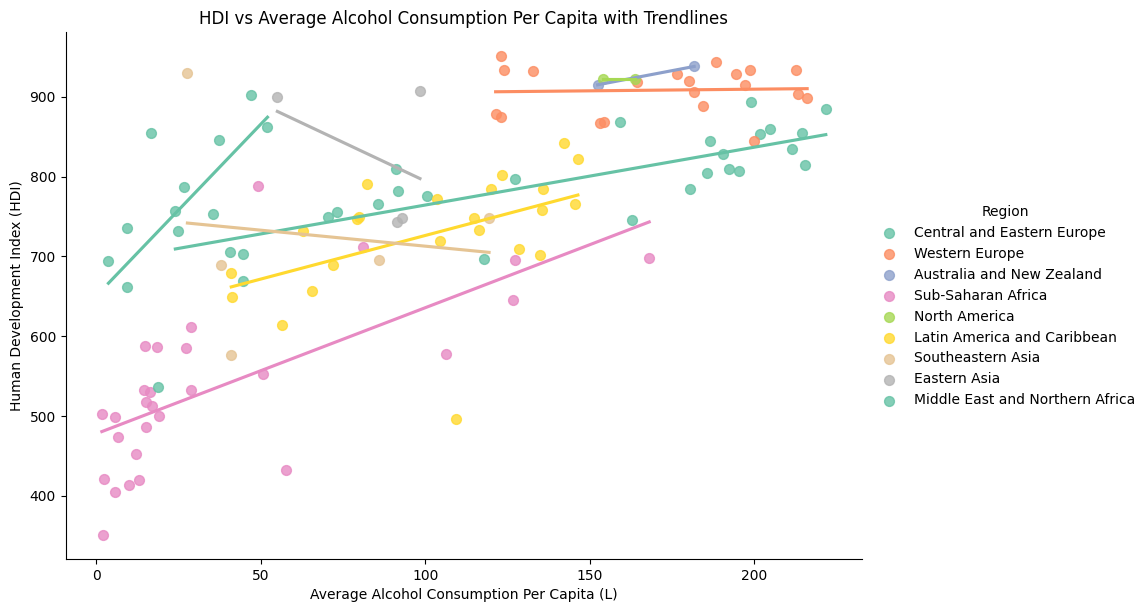

In [109]:
df['Avg_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean(axis=1)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression lines using lmplot
sns.lmplot(x='Avg_Alcohol_PerCapita', y='HDI', hue='Region', data=df, 
           palette='Set2', height=6, aspect=1.5, scatter_kws={'s': 50}, ci=None)

# Set the title and labels
plt.title('HDI vs Average Alcohol Consumption Per Capita with Trendlines')
plt.xlabel('Average Alcohol Consumption Per Capita (L)')
plt.ylabel('Human Development Index (HDI)')

# Display the plot
plt.show()


<Figure size 1000x600 with 0 Axes>

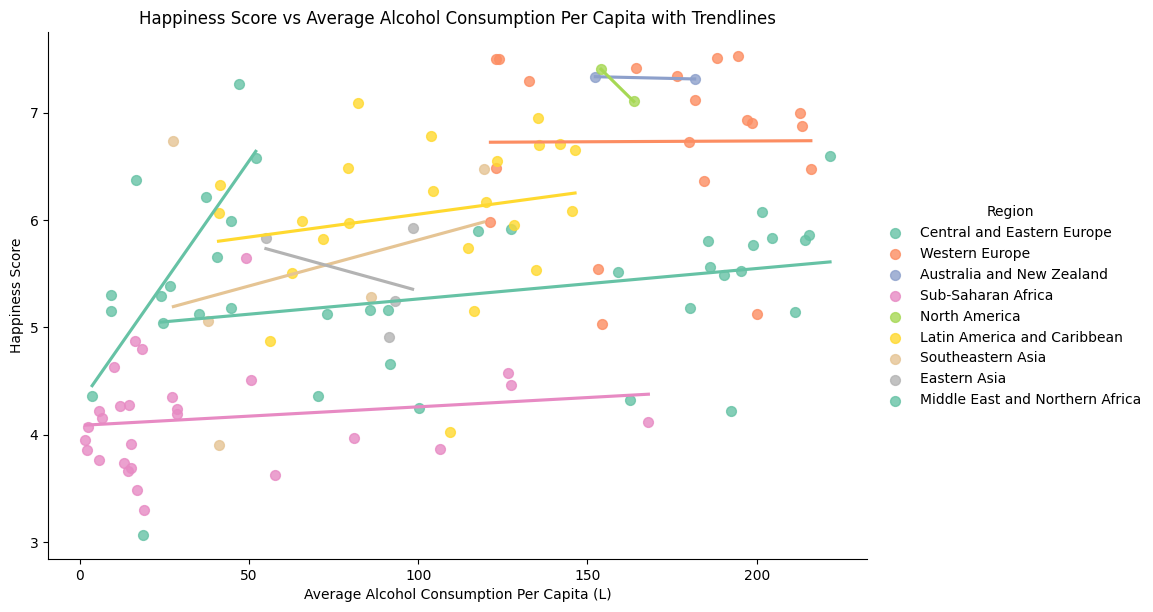

In [108]:
# Calculate total alcohol consumption per capita for each country
df['Avg_Alcohol_PerCapita'] = df[['Beer_PerCapita', 'Spirit_PerCapita', 'Wine_PerCapita']].mean(axis=1)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression lines using lmplot
sns.lmplot(x='Avg_Alcohol_PerCapita', y='HappinessScore', hue='Region', data=df, 
           palette='Set2', height=6, aspect=1.5, scatter_kws={'s': 50}, ci=None)

# Set the title and labels
plt.title('Happiness Score vs Average Alcohol Consumption Per Capita with Trendlines')
plt.xlabel('Average Alcohol Consumption Per Capita (L)')
plt.ylabel('Happiness Score')

# Display the plot
plt.show()
